In [38]:
# source 
# https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/


In [60]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture



In [39]:
# initialize the data set we'll work with

training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

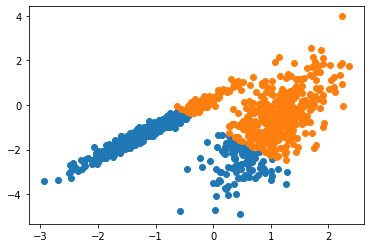

In [42]:
# define the model
kmeans_model = KMeans(n_clusters=2)

# # assign each data point to a cluster
kmeans_result = kmeans_model.fit_predict(training_data)

# # get all of the unique clusters
kmeans_clusters = unique(kmeans_result)

# plot the DBSCAN clusters
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

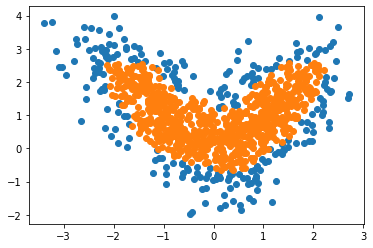

In [31]:


# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=15)

# train the model
dbscan_model.fit(training_data)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(training_data)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

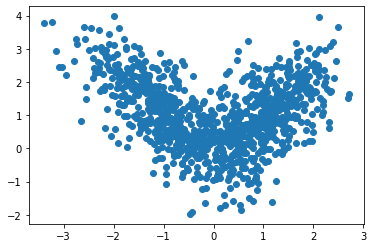

In [34]:
# define the model
mean_model = MeanShift()

# assign each data point to a cluster
mean_result = mean_model.fit_predict(training_data)

# get all of the unique clusters
mean_clusters = unique(mean_result)

# plot Mean-Shift the clusters
for mean_cluster in mean_clusters:
    # get data points that fall in this cluster
    index = where(mean_result == mean_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the Mean-Shift plot
pyplot.show()

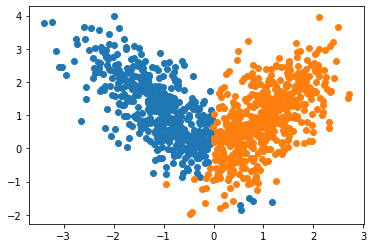

In [37]:
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(training_data)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(training_data)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result)

# plot Gaussian Mixture the clusters
for gaussian_cluster in gaussian_clusters:
    # get data points that fall in this cluster
    index = where(gaussian_result == gaussian_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the Gaussian Mixture plot
pyplot.show()

In [57]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


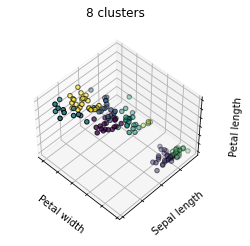

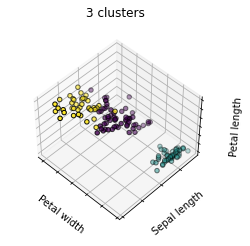

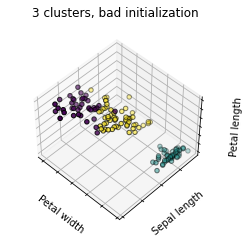

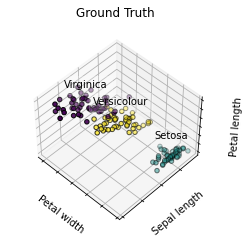

In [66]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()